# Regresión Logística: Predicción de Enfermedad Coronaria

A continuación se observa un problema de clasificación binaria y se desea analizar una posible solución a partir de un modelo de regresión logística. Se busca implementar el algoritmo mencionado, inicialmente empleando la librería SciKit-Learn para luego desarrollar el mismo proceso de entrenamiento manualmente (Descenso de Gradiente Estocástico).

También se introducirán algunos conceptos para lidiar con datos desbalanceados como: matriz de confusión, curva ROC, y algunas otras métricas importantes.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **20 de septiembre** y se realizará a través de Bloque Neón.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
import matplotlib.mlab as mlab
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
heart_df=pd.read_csv("heartDisease/framingham.csv")
heart_df.dropna(axis=0,inplace=True)
heart_df.head()

FileNotFoundError: ignored

In [2]:
heart_df=pd.read_csv("framingham.csv")
heart_df.dropna(axis=0,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
print(f'Se tienen {len(heart_df)} datos.')# Se tienen 3749 datos.

Se tienen 3749 datos.


### Análisis de Distribución de Clases

En el diagrama a continuación puede observar un claro desbalanceo de los datos, en pasos posteriores hablaremos al respecto.

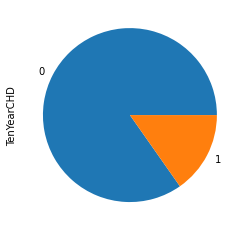

In [4]:
heart_df['TenYearCHD'].value_counts().plot(kind='pie')

## Descripción de Variables

Cada atributo es un factor potencial de riesgo. Existen factores demográficos, conductuales y médicos.

- Demográfico:

    - male: masculino (1) o femenino (0); (Nominal)

    - age: edad del paciente; (Continuo: aunque las edades registradas se han truncado a números enteros, el concepto de edad es continuo)

- Comportacional:

    - currentSmoker: si el paciente es o no fumador actual (nominal)

    - cigsPerDay: la cantidad de cigarrillos que la persona fumó en promedio en un día (se puede considerar continuo ya que uno puede tener cualquier cantidad de cigarrillos, incluso medio cigarrillo).

- Historia médica:

    - BPMeds: si el paciente estaba o no tomando medicación para la presión arterial (nominal)

    - prevalentStroke: si el paciente había tenido previamente un accidente cerebrovascular o no (nominal)

    - prevalentHyp: si el paciente era hipertenso (nominal)

    - diabetes: si el paciente tenía diabetes o no (nominal)

- Estado Médico actual:

    - totChol: nivel de colesterol total (continuo)

    - sysBP: presión arterial sistólica (continua)

    - diaBP: presión arterial diastólica (continua)

    - IMC: índice de masa corporal (continuo)

    - heartRate: frecuencia cardíaca (continua: en la investigación médica, variables como la frecuencia cardíaca, aunque de hecho son discretas, se consideran continuas debido a la gran cantidad de valores posibles).

    - glucose: nivel de glucosa (continuo)

- **Variable a Predecir**

    - TenYearCHD: Riesgo de padecer enfermedad coronaria 10 años en el futuro (binario: "1", significa "Sí", "0" significa "No")

##Preprocesamento de los datos MinMaxScaler##: Siempre se deben preprocesar todos los datos.

In [5]:
x = heart_df.values
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x) # Aplique el escalamiento #
heart_df_scaled = pd.DataFrame(x_scaled, columns=heart_df.columns) # Conversión a un DataFrame #
heart_df_scaled.head()




,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,0.0,0.000000,0.0,0.0,0.0,0.0,0.140652,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.0,0.000000,0.0,0.0,0.0,0.0,0.234991,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,1.0,0.285714,0.0,0.0,0.0,0.0,0.226415,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,1.0,0.428571,0.0,0.0,1.0,0.0,0.192110,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,1.0,0.328571,0.0,0.0,0.0,0.0,0.295026,0.219858,0.380952,0.183228,0.414141,0.127119,0.0


##Partición de Datos: 80% son los datos de entrenamiento y 20% los datos de prueba o test.

In [6]:
x = heart_df_scaled.iloc[:,:-1] # entradas features
y = heart_df_scaled.iloc[:,-1] # esta es la salida real yi


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
x.head()


,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.184211,0.0,0.000000,0.0,0.0,0.0,0.0,0.140652,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.0,0.368421,0.0,0.000000,0.0,0.0,0.0,0.0,0.234991,0.177305,0.349206,0.319680,0.515152,0.101695
2,1.0,0.421053,1.0,0.285714,0.0,0.0,0.0,0.0,0.226415,0.208038,0.338624,0.237518,0.313131,0.084746
3,0.0,0.763158,1.0,0.428571,0.0,0.0,1.0,0.0,0.192110,0.314421,0.497354,0.316045,0.212121,0.177966
4,0.0,0.368421,1.0,0.328571,0.0,0.0,0.0,0.0,0.295026,0.219858,0.380952,0.183228,0.414141,0.127119


## Parte 1

A continuación, debe utilizar la función `LogisticRegression` de SciKit-Learn para obtener un primer modelo de regresión logística y calcular su precisión a partir de la función `accuracy_score`.

Obtenga resultados sobre los datos de entrenamiento y los datos de prueba. Concluya al respecto.

In [ ]:
logreg = # Modelo de Regresión Logística #
logreg. # Entrenamiento sobre los Datos #
y_pred = logreg.predict(x_test) # Predicción de Etiquetas #

print(f'Precisión inicial: {# INCLUYA AQUÍ EL CÁLCULO DE LA PRECISIÓN DEL MODELO #}')

In [90]:
#se tiene que importar
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score


logreg = LogisticRegression() # Modelo de Regresión Logística #
logreg.fit(x_train,y_train) # Entrenamiento sobre los Datos#
y_pred = logreg.predict(x_test) # Predicción de Etiquetas #
#print(f'Precisión inicial: {# INCLUYA AQUÍ EL CÁLCULO DE LA PRECISIÓN DEL MODELO #}')
print('Precision_Positive_Prediction: {:.2f}'.format(precision_score(y_test,y_pred)))
#llamar a las demás metricas para analizar los resultados relacionado con la presición}
#Accuracy
print('Accuracy_precision: {:.2f}'.format(accuracy_score(y_test,y_pred))) # Nota en algunos lugares encuentro que la accuracy es diferente a al precisión. 
#Recall
print('Recall: {:.2f}'.format(recall_score(y_test,y_pred)))

#f1_score
print('f1: {:.2f}'.format(f1_score(y_test,y_pred)))

#matriz de confusion
confusion= confusion_matrix(y_test,y_pred)
print(confusion)



Precision_Positive_Prediction: 0.71
Accuracy_precision: 0.85
Recall: 0.08
f1: 0.15
[[624   4]
 [112  10]]


In [91]:
(624+10)/(624+4+112+10)

0.8453333333333334

##Nota Precisión vs Accuracy

En el estudio de la presición encontre dos precisiones que depronto causan confusión, por lo cual haré referenica a:

Precisión_positive_prediction= fracción de predicciones positivas que son correctas.

Precisión_positive_prediction=TP/(TP+FP)


Accuracity_precision: (TN+TP)/(TN+TP*FP+FN)




##Análisis de resultados:
Hay varias métricas para saber el desempeno de regresicón logística, en la anterior tarea de regresión lineal solo se vió el error. Ahora en regresión logística va a depender de muchas más metricas para evaluar el clasificador.

Precisión_positive_prediction: que fracción de la 'Positive prediction' son correctas'.

Precision_positive_prediction = TP/(TP+FP)
TP=True positive
FP=False Positive
Se aplica la presición_positive_prediction al problema de predecir enfermedad coronaria en 10 años en pacientes. La regresión logística divide los datos, pero con una función sigmoide, en regresión lineal era una recta. Cuando se divide quedan dos clases: clase 1 equivale a decir que el paciente Si va a padecer de enfermedad coronaria. y clase 0, el paciente No va a padecer en 10 años de enfermedad coronaria.
En la precisión_positive_prediction solo se va a observar las muestras que quedaron en clase 1 que son dos:
True Positive: el clasificador las asigno como clase 1 y efectivamente son verdaderas. (El paciente en 10 años si se va a enfermar y el clasificar lo predijo correctamente)
FP= son pacientes que el clasificador asignó como clase 1 pero no se van a enfermar en 10 años. (El paciente en 10 años no se va a enfermar, pero el clasificador se equivocó porque le predijo que si se iba a enfermar)
En conclusión, la precisión mide la fración de 'positive prediction' lo importante es tener un FP muy pequeño para que el clasificador tenga una precisión alta y sea eficiente. 

En esta tarea se halló dos formas la primera se  importó 'precision_score'
de sklearn.metrics. 

Hay otra manera que se puede realizar a partir de la fórmula matematica, para poder hallarlo se tiene que llamar a la matriz de confusión:
[[624   4]
 [112  10]]

TP=10 (segunda fila, segunda columna de la Matriz de confusión)
FP= 4 (primera fila, segunda columna)

Precision_Clasificar= 10/(10+4)
print(Precision_Clasificar)
0.7142857142857143

Tanto por la función de 'precision_score', como por la matriz de confusión, da ovbiamente el mismo resultado que a primera vista se ve alto, pero no nos podemos engañar porque, aunque 0.71 es alto, las TP y las FP son magnitudes muy pequeñas comparados con total de todas las muestras (624+112+4+10). El resultado es bueno, pero hay medida muy importante que es llamado Recalls y que se observa mucho en aplicaciones médicas como es este caso. Antes se recomienda si el Recalls es muy bajo, se recomienda subirlo arriesgando la precisión. 



ACCURACY_PRECISIÓN: fracción de todas las instancias donde la predicción del clasificador es correcta para las dos  clases: 1 y 0. Tuvo un valor de 0.85 muy bueno.
ACCURACY_PRECISIÓN=(TN+TP/(TN+TP+FP+FN)
ERROR=1-ACCURACY_PRECISIÓN

Recalls: también llamada ‘true positive rate’. 

Recalls= TP/(TP+FN)

TP: true positive 
FN= son pacientes que el clasificador los puse en la clase 0 pero en 10 años van a padecer de esta enfermedad, este dato para mí es muy importante porque es la situción más grave que se pueda presentar, el  FN se tiene que bajar al máximo, y en la teoría dice que hay subirlo así se arreiesgue bajar  la precisión. Recalls fue de 0.08 es muy malo si se observa la matriz de confusión los FN(segunda fila, primera columna), es de 112 es muy alto, equivale a pacientes que se les va a decir que no se van a enfermar y en 10 años si van a padecer  enfermedad, 112 de 750 es un gran número.

¿Cuál es la solución?  cambiar la el umbral de división entre clase 1 y clase 0, que se verá más adelante. cuando se defina la función Binarize. 

F1_score: combina la precisión y el recall, 0.15 que ya se esperaba, porque se tiene una buena precisión vs una mal Recalls. 
F1_score= 2TP/(2TP+FN+FP)


NOTACIÓN

MATRIZ DE CONFUSIÓN
 
TN	FP
FN	TP

TN= el clasificador lo ubicó en 0 y en 10 años no se va a enfermar. 
FP= el clasificador lo ubicó en 1 y en 10 años no se va a enfermar. 
TP= el clasificador lo ubicó en 1 y en 10 años se va a enfermar. 
FN= el clasificador lo ubicó en 0 y en 10 años se va a enfermar
Clase 1. Clasificador paciente enfermo
Clase 0: Clasificador paciente sano.


Nota:
 A veces encuentro accuracy distinta en presición:
Accuracy_Precisión=(TN+TP)/(TN+TP+FP+FN) Yo creo que esta es la màs importante porque es a nivel general
Presición_positive_prediction: TP/(TP+FP) se focaliza en predicciones positidas en la clase 1








In [ ]:
Precision_Clasificar= 10/(10+4)
print(Precision_Clasificar)

0.7142857142857143


In [ ]:
#Análisis de LogisticRegressión cambiando C, no se ve ninguna alteración cambia un poco cuando el c en muy pequeño.
logreg = LogisticRegression(C=10000000000000000) # Modelo de Regresión Logística #
logreg.fit(x_train,y_train) # Entrenamiento sobre los Datos#
y_pred = logreg.predict(x_test) # Predicción de Etiquetas #
#print(f'Precisión inicial: {# INCLUYA AQUÍ EL CÁLCULO DE LA PRECISIÓN DEL MODELO #}')

print('Error de la regresión logística con el set de entrenamiento:{:.2f}'.format(logreg.score(x_train,y_train)))
print('Error de la regresión logística con el set de prueba:{:.2f}'.format(logreg.score(x_test,y_test)))

Precisión de la regresión logística con el set de entrenamiento:0.86
Precisión de la regresión logística con el set de prueba:0.85


In [ ]:
logreg = LogisticRegression(C=0.00000000001) # Modelo de Regresión Logística #
logreg.fit(x_train,y_train) # Entrenamiento sobre los Datos#
y_pred = logreg.predict(x_test) # Predicción de Etiquetas #
#print(f'Precisión inicial: {# INCLUYA AQUÍ EL CÁLCULO DE LA PRECISIÓN DEL MODELO #}')

print('Error de la regresión logística con el set de entrenamiento:{:.2f}'.format(logreg.score(x_train,y_train)))
print('Error de la regresión logística con el set de prueba:{:.2f}'.format(logreg.score(x_test,y_test)))

Precisión de la regresión logística con el set de entrenamiento:0.85
Precisión de la regresión logística con el set de prueba:0.84


### Matriz de Confusión

Como recordará, la información en este dataset no posee una distribución de clases balanceada. La matriz de confusión es una herramienta que permite analizar el comportamiento del modelo para estos datos.

Puede encontrar más información en este artículo: [Understanding Confusion Matrix](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

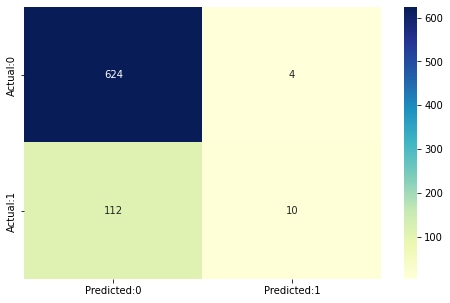

In [8]:
cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

##Análisis de la matriz de confunsión


Error tipo 1 corresponden a False positive que son 4.
Error Tipo 2 correspomde a False negative que son 112.

Por el momento yo considero que el Error tipo 2 es pero que el error tipo 1.
Por las consecuencias que se vió en el ejemplo, el error tipo II (ejemplo el clasificador predice que la mujer no está embarazada y si lo está), mientras que el error tipo I (el clasificador predice que el hombre esta embarazado y no los está), En el ejemplo de la página va a ver mas gravedad, más efectos secundarios en el error tipo 2.
FP=tiene que ver con el error tipo 1
FN=Tiene que ver con el error tipo 2


RECALL= TP/(TP+FN)
RECALL= 624/(624+112)=0.84782
PRESICIÓN_POSITIVE_PREDICTION=TP/(TP+FP)   
PRESICION_POSITIVE_PREDICTION=624((624+4)= 0.99363
ACCURACY_PRECISION= (TP+TN)/TOTAL Esta medica es la mas importante y en la tarea hace referencia como precisión.
ACCURACY_PRECISION= (624+20)/(624+112+4+10)=0.85866



### Tratamiento de Datos Desbalanceados

En casos de estudio como identificación de tendencias patológicas, es común tener datos desbalanceados, o en los cuales la gravedad de cometer [errores tipo I o tipo II](https://www.simplypsychology.org/type_I_and_type_II_errors.html) son bastante diferentes. En muchos casos, se puede preferir cometer cierto tipo de error sobre el otro. Para trabajar con estos problemas, se suele preferir sacrificar algo de [precisión](https://developers.google.com/machine-learning/crash-course/classification/accuracy) del modelo, a cambio de una mejora en términos prácticos.

Este proceso se realiza a partir de la modificación del umbral a partir del cual se decide si un dato pertenece a una clase u otra. Utilice la función `binarize` para obtener valores de `0` ó `1` según las probabilidades de las predicciones realizadas utilizando la función `model.predict_proba`.

Algunas métricas utilizadas para interpretar el rendimiento del modelo son las siguientes:

- F1Score
- TP Rate / Recall / Sensitividad
- TN Rate / Especificidad

Puede encontrar más información sobre estas métricas en los artículos:
- [Accuracy, Precision, Recall or F1?](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)
- [Sensitivity Vs Specificity In Data Science](https://medium.com/fintechexplained/sensitivity-vs-specificity-in-data-science-2f673039dbd1)

## BINARIZE##

In [9]:
from sklearn.preprocessing import binarize

umbrales = [0.5,0.25,0.10,0.14] # Vector que Contiene los Umbrales a Analizar #

for umbral in umbrales:
    #cm2 = 0
    
    y_logistic_prob_yes = logreg.predict_proba(x_test)
    y_pred2 = binarize(y_logistic_prob_yes, umbral,True)
    cm2 = confusion_matrix(y_test,y_pred2[:,1])
    print(f'''->Para un umbral de {round(umbral,4)} tenemos esta matriz de confusión:
{cm2}
Con {cm2[0,0]+cm2[1,1]} predicciones correctas y {cm2[1,0]} falsos negativos.
Sensitividad: {round(cm2[1,1]/(float(cm2[1,1]+cm2[1,0])), 4)} Especificidad: {round(cm2[0,0]/(float(cm2[0,0]+cm2[0,1])), 4)}\n''')   


->Para un umbral de 0.5 tenemos esta matriz de confusión:
[[624   4]
 [112  10]]
Con 634 predicciones correctas y 112 falsos negativos.
Sensitividad: 0.082 Especificidad: 0.9936

->Para un umbral de 0.25 tenemos esta matriz de confusión:
[[545  83]
 [ 78  44]]
Con 589 predicciones correctas y 78 falsos negativos.
Sensitividad: 0.3607 Especificidad: 0.8678

->Para un umbral de 0.1 tenemos esta matriz de confusión:
[[296 332]
 [ 20 102]]
Con 398 predicciones correctas y 20 falsos negativos.
Sensitividad: 0.8361 Especificidad: 0.4713

->Para un umbral de 0.14 tenemos esta matriz de confusión:
[[410 218]
 [ 36  86]]
Con 496 predicciones correctas y 36 falsos negativos.
Sensitividad: 0.7049 Especificidad: 0.6529



##Resultados Binarize
->Para un umbral de 0.5 tenemos esta matriz de confusión:
[[624   4]
 [112  10]]
Con 634 predicciones correctas y 112 falsos negativos.
Sensitividad: 0.082 Especificidad: 0.9936

->Para un umbral de 0.25 tenemos esta matriz de confusión:
[[545  83]
 [ 78  44]]
Con 589 predicciones correctas y 78 falsos negativos.
Sensitividad: 0.3607 Especificidad: 0.8678

->Para un umbral de 0.1 tenemos esta matriz de confusión:
[[296 332]
 [ 20 102]]
Con 398 predicciones correctas y 20 falsos negativos.
Sensitividad: 0.8361 Especificidad: 0.4713

->Para un umbral de 0.14 tenemos esta matriz de confusión:
[[410 218]
 [ 36  86]]
Con 496 predicciones correctas y 36 falsos negativos.
Sensitividad: 0.7049 Especificidad: 0.6529

##Análisis función Binarize
Como se puede observar en la matriz de confusión se tiene un 112 FN(color verde), el cuál correponde al error tipo 2 que debemos evitar. Se utiliza la función 'predict_proba', su función es devolver probabilidades calibradas. 
Y la función Binarize lo que realize es con los umbrales que se le va a dar, si la probabilidad es menor o igual a ese umbral lo remplaza por cero y si es mayor lo remplaza por uno.
Que es lo que genera este cambio de umbral, estamos en nuestra entradax vamos a jugar con los margenes para equilibrar la matriz de confusión, como se vió en clase teórica se tiene una función separadora vamos a mover el punto de clasificación para poder pasar esos falsos negativos que se encuentran en la clase cero al otro lado, donde realmente  pertenecen a la clase uno, y al hacer se va a sacrificar otros datos, puede que pasen pacientes que estaban en la clase 0 y esten bien clasificados y pasen a la clase uno. Con estos umbrales se trata de equilibrar los datos porque se debe a toda costa reducir los falsos negativos.
También sucede lo mismo con los falsos positivos que se encuentran en la clase uno pero son realmente de la clase cero y al cambiar el umbral tratar de pasarlos al la clase que le corresponde. 

Se mencionan dos métricas:

Sensitividad es el mismo Recall que se mencionó anteriormente.

Sensitividad o Recall= TP/(TP+FN)

Para mi la sensitividad depende de TP que son los pacientes que van a enfermar y el clasificador los puso en clase 1, y de FN que son pacientes que si se van a enfermar y el clasificador los puse en la clase cero, este es el error tipo 2.
Lo que se quiere es que el FN sea los más pequeño y más en aplicaciones médicas porque es sumamente grave decirle a un paciente que no se va a enfermar ubicarlo en la clase cero y 10 años más tarde enfermarse. Por eso en la teoría dice que este error tipo 2 en medicina no es lo que se quiere.

Acá se encuentra otra métrica llamada especificidad

Especificidad= TN/(TN+FP)

FP es error tipo 1 
La especificidad depende de TN: los que no se van a enfermar y fueron clasificados en la clase cero (resultado excelente) y FP los que no se van a enfermar en 10 años pero el clasificador los puso en la clase 1, este es error es tipo 1. 
Lo que se quiere con la especificidad es que FP sea lo más pequeño posible, ya que no se quiere decirle a un paciente que se va a enfermar y que en 10 años no se enferme, también es grave.







Por otra parte, un criterio que facilita el visualizar este trade-off se conoce como la Curva ROC, en donde se ubican múltiples puntos para distintos valores del umbral de clasificación. Puede leer el artículo a continuación para una explicación más detallada:
- Curva ROC: [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

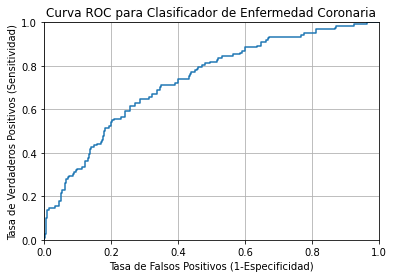

In [92]:
from sklearn.metrics import roc_curve

#fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
fpr, tpr, thresholds = roc_curve(y_test,y_logistic_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC para Clasificador de Enfermedad Coronaria')
plt.xlabel('Tasa de Falsos Positivos (1-Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensitividad)')
plt.grid(True)

##ANÁLISIS CURVA ROC


Especificidad= TN/(TN+FP)
Sensitividad o Recall= TP/(TP+FN)

Como el objetivo que se quiere al implementar un clasificador de regresión logística es que tanto los falsos positivos como los falsos negativos sean lo más pequeños posibles para que esta función sea lo mas alto posible. Lo mejor es que tanto la especificidad como la sencitividad tiendan a uno. Yo diría que es un poco más importante no tener FN que crezca rapido en sensitividad y despues sea constante en 1 y llegue hasta 1 en especificidad. 
Similar a una función logarítmica creciente.  El mejor comportamiento lo tiene el umbral de 0.14 porque auque no sea la máxima en especificidad y sensitividad independientemente, en promedio son las más altas.


Observe la gráfica, y teniendo en cuenta los resultados concluya sobre la proporción que se puede considerar más adecuada en este contexto.

## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico para un modelo de regresión logística. Realice el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista errores se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

##PARTE 2 

In [379]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
np.random.seed(22)
X_train_array = np.c_[np.ones(x_train.values.shape[0]), x_train.values]
y_train_array = y_train.values

w0 = np.random.rand(X_train_array.shape[1]) # Inicialización de w #

w = w0.copy()
# Inicialización de criterio de parada (al disminuir el valor de eps, se aumenta la precisión y el tiempo de procesamiento)
eps = 1e-5
error = 100
dif = 100
#Declaracion de lista de errores
errores = []
#Declaración de la lista de Dif_list
dif_list=[]

sigma1_list=[] #lista para guardar los valores sigma1
mag_w_kplusone_list=[] #lista para guardar la magnitud de los  w_kplusone 

itera_num=0
mag_w_kplusone = float('inf')


def sigma(w,x):
    wx=np.dot(w,x)
    exp_wx=np.exp(-wx)

    res_sigmoid = 1/(1+exp_wx)# Salida de la función sigmoide #
    return res_sigmoid

tasas =[0.02,0.01,0.05]   # Defina un vector que contenga las tasas que desea probar #
for tasa in tasas:
    while error>eps:         # Criterio de parada 1 #
        #indice=np.random.randint(3749, size = 1)
        for j in range (0, 1000):  # Criterio de parada 2 #
            xActual = X_train_array[j]
            yActual = y_train_array[j]  

            sigma1=sigma(w,xActual)  # llamado a función sigma 
            sigma1_list.append(sigma1) 
            error= np.subtract(yActual,sigma1) # se define el error yi-sigma(wt), revizar en que valores se encuentra y 
         
            errores.append(error) 
            grad_lw=np.multiply(error,xActual) #se define el gradiente
            tasa_grad_lw=np.multiply(tasa,grad_lw) #tasa por el gradiente 
            w_kplusone= w+tasa_grad_lw  #Definición de w_k+1
            mag_w_kplusone= np.linalg.norm(w_kplusone)
            mag_w_kplusone_list.append(mag_w_kplusone)
            #dif_list.append(dif)
            
            
            dif_vector=np.subtract(w_kplusone,w)
            dif= np.linalg.norm(dif_vector)
            dif_list.append(dif)
            
            itera_num=itera_num +1
            w_prueba=w
            w = w_kplusone  
            print(j)
            print(dif)
            print(w_kplusone)  
             
            print(error)
            
  


    print('blasstoff')
    print(tasa)
    print(error)
    print(w)
print(w_kplusone)
print(errores)#al graficar hay que sacarle el valor abs por los valores negativos
print(dif_list)  
print(dif_log_list)
X_test_array = np.c_[np.ones(x_test.values.shape[0]), x_test.values]
y_test_array = y_test.values

y_pred = np.zeros(len(x_test))

for i in range(0,len(x_test)):
    prob = sigma(w,X_test_array[i])
    if prob>0.19:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

print(f'Precisión modelo actual: {sklearn.metrics.accuracy_score(y_test,y_pred)}')

#Recall
print('Recall: {:.2f}'.format(recall_score(y_test,y_pred)))

#f1_score
print('f1: {:.2f}'.format(f1_score(y_test,y_pred)))

print(w_prueba)

Se han truncado las últimas 5000 líneas del flujo de salida.
192
0.012704690976258861
[-1.15709364 -0.00451921 -0.16041473  0.13344526 -0.01585056  0.32995903
  0.2774787   0.29611167  0.16711787  0.54320391 -0.28649887  0.07682045
  0.49072016  0.26898765  0.03220678]
-0.33787519330760724
193
0.009960870762979808
[-1.16333285 -0.00451921 -0.1625492   0.12720604 -0.01674187  0.32995903
  0.2774787   0.29611167  0.16711787  0.54195178 -0.28745762  0.07503782
  0.48984159  0.26596258  0.03155466]
-0.31196064344688995
194
0.006926402150958948
[-1.16895955 -0.00451921 -0.16536255  0.12720604 -0.01674187  0.32995903
  0.2774787   0.29611167  0.16711787  0.54086119 -0.2880296   0.07366836
  0.48817922  0.26459853  0.03093477]
-0.28133498990975037
195
0.007995220605093268
[-1.17466456 -0.00451921 -0.16896571  0.12720604 -0.01674187  0.32995903
  0.2774787   0.29611167  0.16711787  0.5393542  -0.28908159  0.07143465
  0.48697904  0.26183246  0.02996782]
-0.28525037879239
196
0.0063213697410875

## Matriz de Confusión

Observe y analice la matriz de confusión para su mejor modelo. Escriba claramente sus conclusiones.

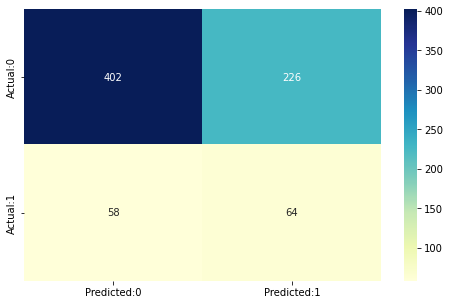

In [380]:
cm3 = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm3,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [381]:
print(f'''->tenemos esta matriz de confusión:
{cm3}
Con {cm3[0,0]+cm3[1,1]} predicciones correctas y {cm3[1,0]} falsos negativos.
Sensitividad: {round(cm3[1,1]/(float(cm3[1,1]+cm3[1,0])), 4)} Especificidad: {round(cm3[0,0]/(float(cm3[0,0]+cm3[0,1])), 4)}\n''') 

->tenemos esta matriz de confusión:
[[402 226]
 [ 58  64]]
Con 466 predicciones correctas y 58 falsos negativos.
Sensitividad: 0.5246 Especificidad: 0.6401



Como se puede observar en la matriz confusión, si tuve que cambiar el umbral porque en Prob>0.5 no funcionaba cuando se halla la matriz de confusión el recall era de cero tenía muchos FN, por tanto empecé a cambiar el umbral. A continuación se muestra un cuadro de como variaba al cambiar las probabilidades:

Con tasa 0.02 fue por ahora el mejor comportamiento

Tasa: 0.02
Probabilidad por encima de:	Accuracy_Precisión	Especificidad	Sensitividad
0.24	0.80	0.93	0.1475
0.22	0.7146	0.79	0.3197
0.21	0.6706	0.715	0.4426
0.20	0.6586	0.6911	0.4918
0.19	0.6213	0.6401	0.5246

Valores mayores a 0.24 y menores a 0.19 se caía alguna de las métricas, en los datos del cuadro son los más estables. 
Como se observa en la tabla con Prob>0.19 se estabiliza las tres métricas.

Por otra parte vamos a analizar la matriz de confusión final:

[[402 226]
 [ 58  64]]

Como se puede ver el clasificador cuenta con 466 predicciones correctas, 58 FN: se trató de bajar lo más posible este número porque de tipo 2 y en medicina es muy grave, pero no está tan alto. Lo que si està un poco alto son los falsos positivosque aunque son de tipo 1, pues prefiero clasificar a alguien enfermo pero que a futuro no se enferme. Pero si hay que bajarlo pero este fue el más óptimo al que pude llegar.







##Revisión de la magnitud de w_plusone porque cada vez debe estar creciendo 

Text(0, 0.5, 'Magnitud de w_kplusone')

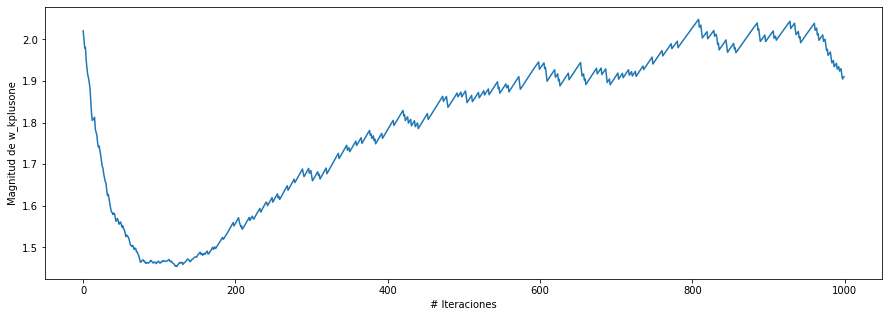

In [369]:
plt.figure(figsize=(15,5))
plt.plot(mag_w_kplusone_list)
plt.xlabel('# Iteraciones')
plt.ylabel('Magnitud de w_kplusone')


##Análisis magnitud de wk+1

Si suponía que es una función que debe ser creciente, cada vez que pasa una iteración w_k+1 esta dumado por w+tasa*e*x o w+tasa*gradienteL(w)

[0.10044095834037466, 0.10428016557245512, 0.06964391947504393, 0.9401241886732283, 0.03297436373079253, 0.08652197413648798, 0.12539634575709, 0.23372501800550458, 0.16836978726319982, 0.1265988547654474, 0.03196422744926618, 0.028384665671005182, 0.08547762428216395, 0.9710942319395282, 0.9078429650419813, 0.8434001889462708, 0.02831167425563174, 0.21494979122583605, 0.2277585764483723, 0.06256562962921942, 0.15852151343029913, 0.9519826080563945, 0.14195802136504743, 0.12715683493239294, 0.10245501584522537, 0.11119704977814909, 0.24285654123428885, 0.08452086307278547, 0.1213494197374943, 0.14108847307502256, 0.2039750963637226, 0.05325160051876147, 0.0768535134269888, 0.8501724773074022, 0.1136372409473994, 0.0938156376100674, 0.11231940518558584, 0.12359201378716925, 0.23276274403346559, 0.17149117417231377, 0.9587111861540587, 0.272028239901782, 0.11072770569143575, 0.06921577105111397, 0.9698462695269314, 0.9513157341719556, 0.13636055930583846, 0.08058756886212365, 0.920953385

Text(0.5, 1.0, 'Regresión Logística')

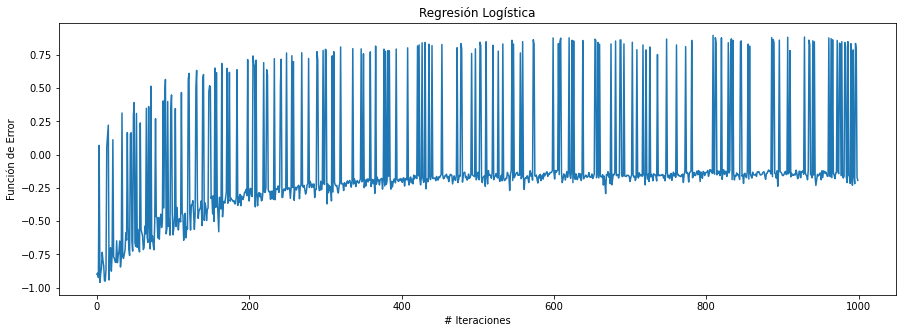

In [370]:
#Función de error

#errores_totales_pos=[abs(x)for x in errores] #antes de graficar saque los valores absolutos.

print(errores_totales_pos)
plt.figure(figsize=(15,5))
#plt.plot(errores_totales_pos)
plt.plot(errores)
plt.xlabel('# Iteraciones')
plt.ylabel('Función de Error')
plt.title('Regresión Logística')

Análisis de función de error:
Como se observa en la figura empezó con -1, y al aumentar las iteraciones se acercaba al rededor de 0. Como se puede ver es la diferente de yi-sigma(wx) , en los resultados nos damos cuenta que varía entre ceranos a cero y cercanos a uno. Voy a utilizar la función Binarize a ver que sucede?

##Apéndice cambio de tasa:0.01

In [372]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
np.random.seed(22)
X_train_array = np.c_[np.ones(x_train.values.shape[0]), x_train.values]
y_train_array = y_train.values

w0 = np.random.rand(X_train_array.shape[1]) # Inicialización de w #

w = w0.copy()
# Inicialización de criterio de parada (al disminuir el valor de eps, se aumenta la precisión y el tiempo de procesamiento)
eps = 1e-5
error = 100
dif = 100
#Declaracion de lista de errores
errores = []
#Declaración de la lista de Dif_list
dif_list=[]

sigma1_list=[] #lista para guardar los valores sigma1
mag_w_kplusone_list=[] #lista para guardar la magnitud de los  w_kplusone 

itera_num=0
mag_w_kplusone = float('inf')


def sigma(w,x):
    wx=np.dot(w,x)
    exp_wx=np.exp(-wx)

    res_sigmoid = 1/(1+exp_wx)# Salida de la función sigmoide #
    return res_sigmoid

tasas =[0.01,0.0001,0.00001, 0.02 ]   # Defina un vector que contenga las tasas que desea probar #
for tasa in tasas:
    while error>eps:         # Criterio de parada 1 #
        #indice=np.random.randint(3749, size = 1)
        for j in range (0, 1000):  # Criterio de parada 2 #
            xActual = X_train_array[j]
            yActual = y_train_array[j]  

            sigma1=sigma(w,xActual)  # llamado a función sigma 
            sigma1_list.append(sigma1) 
            error= np.subtract(yActual,sigma1) # se define el error yi-sigma(wt), revizar en que valores se encuentra y 
         
            errores.append(error) 
            grad_lw=np.multiply(error,xActual) #se define el gradiente
            tasa_grad_lw=np.multiply(tasa,grad_lw) #tasa por el gradiente 
            w_kplusone= w+tasa_grad_lw  #Definición de w_k+1
            mag_w_kplusone= np.linalg.norm(w_kplusone)
            mag_w_kplusone_list.append(mag_w_kplusone)
            #dif_list.append(dif)
            
            
            dif_vector=np.subtract(w_kplusone,w)
            dif= np.linalg.norm(dif_vector)
            dif_list.append(dif)
            
            itera_num=itera_num +1
            w_prueba=w
            w = w_kplusone  
            print(j)
            print(dif)
            print(w_kplusone)  
             
            print(error)
            
  


    print('blasstoff')
    print(tasa)
    print(error)
    print(w)
print(w_kplusone)
print(errores)#al graficar hay que sacarle el valor abs por los valores negativos
print(dif_list)  
print(dif_log_list)
X_test_array = np.c_[np.ones(x_test.values.shape[0]), x_test.values]
y_test_array = y_test.values

y_pred = np.zeros(len(x_test))

for i in range(0,len(x_test)):
    prob = sigma(w,X_test_array[i])
    if prob>0.19:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

print(f'Precisión modelo actual: {sklearn.metrics.accuracy_score(y_test,y_pred)}')

#Recall
print('Recall: {:.2f}'.format(recall_score(y_test,y_pred)))

#f1_score
print('f1: {:.2f}'.format(f1_score(y_test,y_pred)))

print(w_prueba)

Se han truncado las últimas 5000 líneas del flujo de salida.
-0.5434431618633888
184
0.00829064388370066
[-0.71160098  0.12002329  0.01121586  0.38554853  0.04903549  0.32337002
  0.27223558  0.41092308  0.17952058  0.63017788 -0.19839391  0.22658362
  0.59276577  0.43054625  0.08031239]
0.42269960353284786
185
0.009636351215312311
[-0.71726993  0.12002329  0.00748629  0.38554853  0.04903549  0.32337002
  0.27223558  0.40525414  0.17952058  0.62816506 -0.19950626  0.22511389
  0.59142891  0.42831303  0.07963981]
-0.5668945765206723
186
0.008077118317048451
[-0.7223908   0.12002329  0.00559965  0.38042765  0.04757238  0.32337002
  0.27223558  0.40525414  0.17952058  0.62729548 -0.20045053  0.22362369
  0.59043974  0.42712333  0.07872846]
-0.5120879261374841
187
0.009439692988875393
[-0.72807917  0.12002329  0.00365363  0.37473928  0.04594714  0.32337002
  0.27223558  0.40525414  0.17952058  0.62566605 -0.20132463  0.22235961
  0.58893562  0.42396313  0.07789289]
-0.568836330249953
188
0

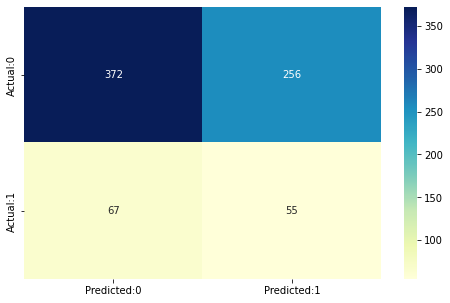

In [374]:
cm4 = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm4,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [375]:
print(f'''->tenemos esta matriz de confusión:
{cm4}
Con {cm4[0,0]+cm4[1,1]} predicciones correctas y {cm4[1,0]} falsos negativos.
Sensitividad: {round(cm4[1,1]/(float(cm4[1,1]+cm4[1,0])), 4)} Especificidad: {round(cm4[0,0]/(float(cm4[0,0]+cm4[0,1])), 4)}\n''') 

->tenemos esta matriz de confusión:
[[372 256]
 [ 67  55]]
Con 427 predicciones correctas y 67 falsos negativos.
Sensitividad: 0.4508 Especificidad: 0.5924



##Conclusión con tasa =0.01

Los datos siempre se bajan un poquito con respecto a tasa 0.02

##tasa 0.05

In [377]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
np.random.seed(22)
X_train_array = np.c_[np.ones(x_train.values.shape[0]), x_train.values]
y_train_array = y_train.values

w0 = np.random.rand(X_train_array.shape[1]) # Inicialización de w #

w = w0.copy()
# Inicialización de criterio de parada (al disminuir el valor de eps, se aumenta la precisión y el tiempo de procesamiento)
eps = 1e-5
error = 100
dif = 100
#Declaracion de lista de errores
errores = []
#Declaración de la lista de Dif_list
dif_list=[]

sigma1_list=[] #lista para guardar los valores sigma1
mag_w_kplusone_list=[] #lista para guardar la magnitud de los  w_kplusone 

itera_num=0
mag_w_kplusone = float('inf')


def sigma(w,x):
    wx=np.dot(w,x)
    exp_wx=np.exp(-wx)

    res_sigmoid = 1/(1+exp_wx)# Salida de la función sigmoide #
    return res_sigmoid

tasas =[0.05,0.1, 0.02,0.01 ]   # Defina un vector que contenga las tasas que desea probar #
for tasa in tasas:
    while error>eps:         # Criterio de parada 1 #
        #indice=np.random.randint(3749, size = 1)
        for j in range (0, 1000):  # Criterio de parada 2 #
            xActual = X_train_array[j]
            yActual = y_train_array[j]  

            sigma1=sigma(w,xActual)  # llamado a función sigma 
            sigma1_list.append(sigma1) 
            error= np.subtract(yActual,sigma1) # se define el error yi-sigma(wt), revizar en que valores se encuentra y 
         
            errores.append(error) 
            grad_lw=np.multiply(error,xActual) #se define el gradiente
            tasa_grad_lw=np.multiply(tasa,grad_lw) #tasa por el gradiente 
            w_kplusone= w+tasa_grad_lw  #Definición de w_k+1
            mag_w_kplusone= np.linalg.norm(w_kplusone)
            mag_w_kplusone_list.append(mag_w_kplusone)
            #dif_list.append(dif)
            
            
            dif_vector=np.subtract(w_kplusone,w)
            dif= np.linalg.norm(dif_vector)
            dif_list.append(dif)
            
            itera_num=itera_num +1
            w_prueba=w
            w = w_kplusone  
            print(j)
            print(dif)
            print(w_kplusone)  
             
            print(error)
            
  


    print('blasstoff')
    print(tasa)
    print(error)
    print(w)
print(w_kplusone)
print(errores)#al graficar hay que sacarle el valor abs por los valores negativos
print(dif_list)  
print(dif_log_list)
X_test_array = np.c_[np.ones(x_test.values.shape[0]), x_test.values]
y_test_array = y_test.values

y_pred = np.zeros(len(x_test))

for i in range(0,len(x_test)):
    prob = sigma(w,X_test_array[i])
    if prob>0.19:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

print(f'Precisión modelo actual: {sklearn.metrics.accuracy_score(y_test,y_pred)}')

#Recall
print('Recall: {:.2f}'.format(recall_score(y_test,y_pred)))

#f1_score
print('f1: {:.2f}'.format(f1_score(y_test,y_pred)))

print(w_prueba)

Se han truncado las últimas 5000 líneas del flujo de salida.
-0.24179699629466242
182
0.02621626730256066
[-1.46581487  0.10605268 -0.21217317 -0.04520658 -0.03363602  0.37190178
  0.29922629  0.25514009  0.15016875  0.49234631 -0.32114107 -0.00541305
  0.4587971   0.12535373  0.01048198]
-0.27241659384826483
183
0.018967672499191103
[-1.47595708  0.09591047 -0.21644357 -0.05534879 -0.0365338   0.37190178
  0.29922629  0.25514009  0.15016875  0.49062405 -0.32289138 -0.00798885
  0.4572067   0.12248523  0.00942192]
-0.20284418124103235
184
0.0729447130597447
[-1.43876612  0.13310143 -0.19491196 -0.05534879 -0.0365338   0.37190178
  0.29922629  0.29233105  0.15016875  0.49808776 -0.31541802  0.00972113
  0.46605826  0.13600922  0.01404452]
0.7438192189340158
185
0.02299135816057724
[-1.45229165  0.13310143 -0.20381034 -0.05534879 -0.0365338   0.37190178
  0.29922629  0.27880552  0.15016875  0.49328538 -0.31807196  0.00621451
  0.46286864  0.13068098  0.0124398 ]
-0.2705106104344728
186
0

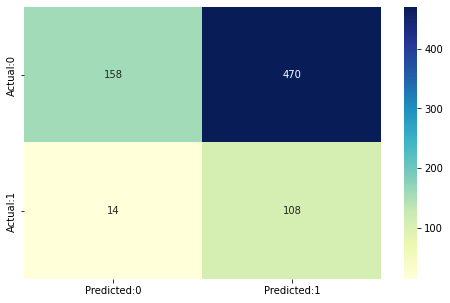

In [378]:
cm5 = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=cm5,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(f'''->tenemos esta matriz de confusión:
{cm5}
Con {cm5[0,0]+cm5[1,1]} predicciones correctas y {cm5[1,0]} falsos negativos.
Sensitividad: {round(cm5[1,1]/(float(cm5[1,1]+cm5[1,0])), 4)} Especificidad: {round(cm5[0,0]/(float(cm5[0,0]+cm5[0,1])), 4)}\n''') 

Con tasa 0.05 podemos se puede observar que FN son muy poquitos , pero los FP crecen muchísimo. 

##Conclusión 
Con Tasa=0.02 muestra el mejor comportamiento del clasificador de regresión logística.

##Conclusión general
Fue un excelente taller, aunque se que tengo muchas fallas siento que trabajar se van encontrando lo errores, muchos de ellos al principio fueron de código que se solucionaron con la ayuda del Monitor Alejando, otros teóricos que hay que estar muy pendiente. También observo que hay muchas variables que hay que tener encuenta y que si una cambia puede dañar todo el clasificador.

ALba Luz Pico Bonilla Código 201421875